<a href="https://colab.research.google.com/github/duskWudi/Tabular_Classification_withPytorch/blob/main/tabular_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: wudife
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 613MB/s]

In [ ]:
import torch # Torch main framework
import torch.nn as nn # Used for getting the NN Layers
from torch.optim import Adam # Adam Optimizer
from torch.utils.data import Dataset, DataLoader # Dataset class and DataLoader for creatning the objects
from torchsummary import summary # Visualize the model layers and number of parameters
from sklearn.model_selection import train_test_split # Split the dataset (train, validation, test)
from sklearn.metrics import accuracy_score # Calculate the testing Accuracy
import matplotlib.pyplot as plt # Plotting the training progress at the end
import pandas as pd # Data reading and preprocessing
import numpy as np # Mathematical operations

device = 'cuda' if torch.cuda.is_available() else 'cpu' # detect the GPU if any, if not use CPU, change cuda to mps if you

In [ ]:
data = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data.head()



,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data.dropna(inplace = True)
data.drop(["id"], axis = 1, inplace = True)
print(data.shape)

(18185, 11)


In [ ]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
print(data["Class"].unique())

[1 0]


In [ ]:
print(data["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [ ]:
#Normalization: make each coloum the maxmize value be one, this case stratege: num = num/largest value in the coloum

orginalData = data.copy()

for column in data.columns:
  data[column] = data[column]/data[column].abs().max()

data.head()



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
#spliting

x = np.array(data.iloc[:,:-1]) #take all the data execpet the last coloum, : means all expect the last one
y = np.array(data.iloc[:, -1]) #only last colum



In [ ]:
xTrain, xTest, yTrain, yTest =train_test_split(x, y, test_size= 0.3)

In [ ]:
xTest, xVal, yTest, yVal =  train_test_split(xTest, yTest, test_size = 0.5)

In [ ]:
print( xTrain.shape,
xVal.shape,
xTest.shape)

(12729, 10) (2728, 10) (2728, 10)


In [ ]:
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x, dtype = torch.float32).to(device) # covert data(pd, np whatever) into tensors, device is GPU
    self.y = torch.tensor(y, dtype = torch.float32).to(device) # covert data(pd, np whatever) into tensors

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index] , self.y[index]




In [ ]:
training_data = dataset(xTrain, yTrain)
validation_data = dataset(xVal, yVal)
testing_data = dataset(xTest, yTest)

In [ ]:
#data loader
trainDataloader = DataLoader(training_data, batch_size = 8, shuffle = True)
valDataloader = DataLoader(validation_data, batch_size = 8, shuffle = True)
testDataloader = DataLoader(testing_data, batch_size = 8, shuffle = True)


In [ ]:
#build Model

hiddenNeurons = 20

class myModel(nn.Module):
  def __init__(self):
    super(myModel, self).__init__()

    self.input_layer = nn.Linear(x.shape[1], hiddenNeurons) #inputLayer
    self.linear = nn.Linear(hiddenNeurons, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = myModel().to(device)

In [ ]:
summary(model, (x.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             220
            Linear-2                    [-1, 1]              21
           Sigmoid-3                    [-1, 1]               0
Total params: 241
Trainable params: 241
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
#lost Function and optmizer

criterion = nn.BCELoss()

optimizer = Adam(model.parameters(), lr = 1e-3 )



In [ ]:
totalLossTrainPlot = []
totalLossValidationPlot = []
totalAccTrainPlot = []
totalAccValidationPlot  = []

epochs = 10

for epoch in range (epochs):
  totalAccTrain = 0
  totalLossTrain = 0
  totalAccVal = 0
  totalLossVal = 0

  for data in trainDataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    # print(prediction.shape)
    # print(prediction.squeeze(1).shape)

    batch_loss = criterion(prediction, labels)

    totalLossTrain += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    totalAccTrain += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()


  #validation with validation dataset

  with torch.no_grad():
    for data in valDataloader:
      inputs, labels = data
      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction, labels)
      totalLossVal = batch_loss.item()
      acc = ((prediction).round() == labels).sum().item()
      totalAccVal += acc

  totalLossTrainPlot.append(round(totalLossTrain/1000, 4))
  totalLossValidationPlot.append(round(totalLossVal/1000, 4))

  totalAccTrainPlot.append(round(totalAccTrain/training_data.__len__() * 100, 4))
  totalAccTrainPlot.append(round(totalAccVal/validation_data.__len__() * 100, 4))

  print(f'''Epoch no. {epoch + 1} Train Loss: {totalLossTrain/1000:.4f} Train Accuracy: {(totalAccTrain/(training_data.__len__())*100):.4f} Validation Loss: {totalLossVal/1000:.4f} Validation Accuracy: {(totalAccVal/(validation_data.__len__())*100):.4f}''')


Epoch no. 1 Train Loss: 0.5091 Train Accuracy: 92.9138 Validation Loss: 0.0001 Validation Accuracy: 98.1672
Epoch no. 2 Train Loss: 0.1041 Train Accuracy: 98.5309 Validation Loss: 0.0000 Validation Accuracy: 98.2038
Epoch no. 3 Train Loss: 0.0737 Train Accuracy: 98.6095 Validation Loss: 0.0000 Validation Accuracy: 98.2038
Epoch no. 4 Train Loss: 0.0666 Train Accuracy: 98.6252 Validation Loss: 0.0000 Validation Accuracy: 98.3138
Epoch no. 5 Train Loss: 0.0648 Train Accuracy: 98.6488 Validation Loss: 0.0000 Validation Accuracy: 98.2771
Epoch no. 6 Train Loss: 0.0640 Train Accuracy: 98.6095 Validation Loss: 0.0000 Validation Accuracy: 98.2405
Epoch no. 7 Train Loss: 0.0618 Train Accuracy: 98.6723 Validation Loss: 0.0000 Validation Accuracy: 98.3138
Epoch no. 8 Train Loss: 0.0622 Train Accuracy: 98.6880 Validation Loss: 0.0002 Validation Accuracy: 98.3504
Epoch no. 9 Train Loss: 0.0622 Train Accuracy: 98.6488 Validation Loss: 0.0000 Validation Accuracy: 98.3871
Epoch no. 10 Train Loss: 0.0

In [ ]:
acc = ((prediction).round() == labels).sum().item()
print(acc)

8


In [ ]:
with torch.no_grad():
  totalLossTest = 0
  totalAccTest = 0
  for data in testDataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion(prediction, labels).item()

    totalLossTest += batch_loss_test

    acc = ((prediction).round() == labels).sum().item()
    totalAccTest += acc



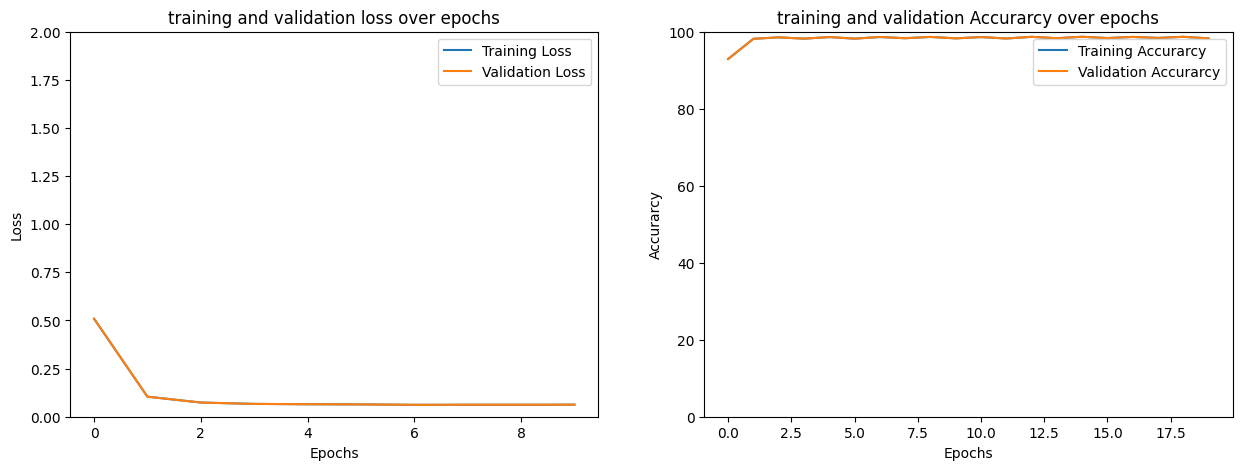

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize =(15,5))

axs[0].plot(totalLossTrainPlot, label = 'Training Loss' )
axs[0].plot(totalLossTrainPlot, label = 'Validation Loss' )
axs[0].set_title("training and validation loss over epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,2])
axs[0].legend()



axs[1].plot(totalAccTrainPlot, label = 'Training Accurarcy' )
axs[1].plot(totalAccTrainPlot, label = 'Validation Accurarcy' )
axs[1].set_title("training and validation Accurarcy over epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accurarcy')
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()